In [68]:
import joblib
import matplotlib.pyplot as plt
import numpy as np

In [69]:
label = joblib.load('score_asap7')
gb = joblib.load('score_model_normalized')
rf = joblib.load('score_model_rf_normalized')

In [70]:
scores = [label, gb, rf]

In [71]:
a = np.sort(label)
b = np.sort(gb)
c = np.sort(rf)

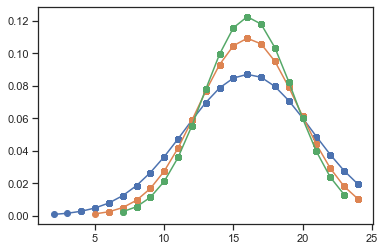

In [72]:
import pylab as pl
import scipy.stats as stats

fita = stats.norm.pdf(a, np.mean(a), np.std(a))  #this is a fitting indeed
fitb = stats.norm.pdf(b, np.mean(b), np.std(b))  #this is a fitting indeed
fitc = stats.norm.pdf(c, np.mean(c), np.std(c))  #this is a fitting indeed

pl.plot(a,fita,'-o')
pl.plot(b,fitb,'-o')
pl.plot(c,fitc,'-o')
#pl.hist(a,density=True)      #use this to draw histogram of your data

pl.show() 

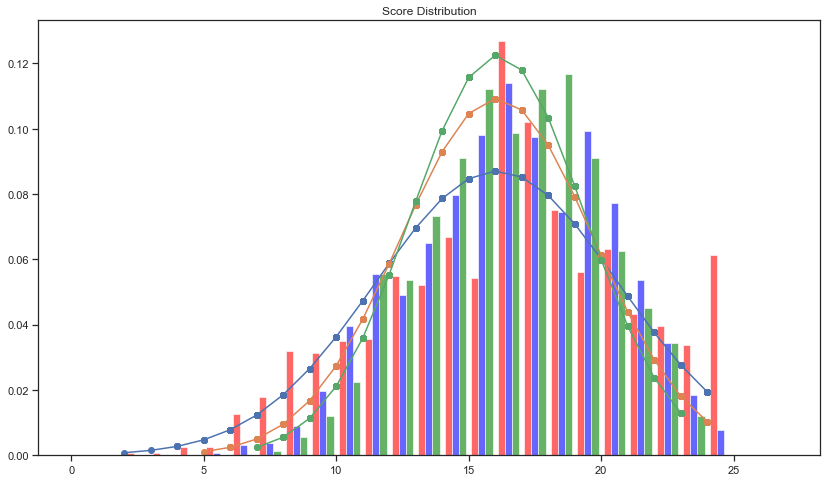

In [73]:
colors = ['red', 'blue', 'green']

plt.figure(figsize=(14,8))
plt.title("Score Distribution")
pl.plot(a,fita,'-o')
pl.plot(b,fitb,'-o')
pl.plot(c,fitc,'-o')
plt.hist(scores, bins=np.arange(28), color=colors, alpha=.6, histtype='bar', density=True)#, linewidth=10)
plt.show()

In [74]:
from collections import Counter
a = Counter(label)
#a

c:\users\20167947\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\20167947\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\20167947\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

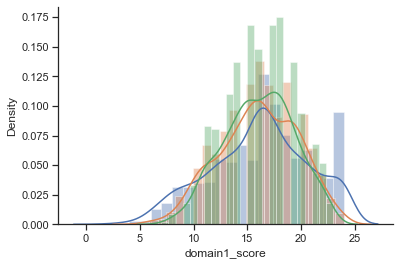

In [75]:
import seaborn as sns
# sns.set(style='ticks')
sns.distplot(label)
sns.distplot(gb)
sns.distplot(rf)
sns.despine()

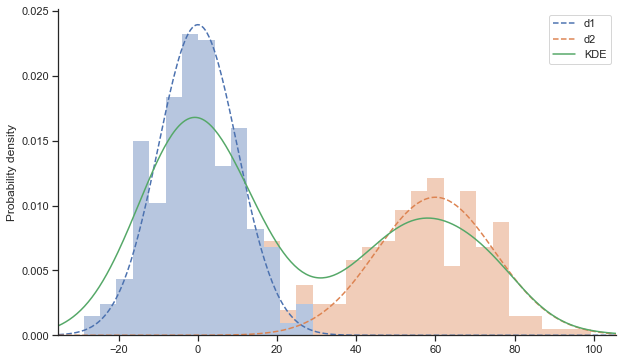

In [76]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='ticks')

# parameterise our distributions
d1 = sps.norm(0, 10)
d2 = sps.norm(60, 15)

# sample values from above distributions
y1 = d1.rvs(300)
y2 = d2.rvs(200)
# combine mixture

ys = np.concatenate([y1, y2])

# create new figure with size given explicitly
plt.figure(figsize=(10, 6))

# add histogram showing individual components
plt.hist([y1, y2], 31, histtype='barstacked', density=True, alpha=0.4, edgecolor='none')

# get X limits and fix them
mn, mx = plt.xlim()
plt.xlim(mn, mx)

# add our distributions to figure
x = np.linspace(mn, mx, 301)
plt.plot(x, d1.pdf(x) * (len(y1) / len(ys)), color='C0', ls='--', label='d1')
plt.plot(x, d2.pdf(x) * (len(y2) / len(ys)), color='C1', ls='--', label='d2')

# estimate Kernel Density and plot
kde = sps.gaussian_kde(ys)
plt.plot(x, kde.pdf(x), label='KDE')

# finish up
plt.legend()
plt.ylabel('Probability density')
sns.despine()

In [77]:
y1 = np.random.randint(100)
y1

24

## Answer Length Distribution

In [84]:
x = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap7')
x.shape

(1569, 780)

In [97]:
length = x[:,0]
length

array([ 497.,  468.,  764., ...,  887., 1536.,  765.])

In [98]:
l = np.sort(length)

In [99]:
fitl = stats.norm.pdf(l, np.mean(l), np.std(l))  #this is a fitting indeed

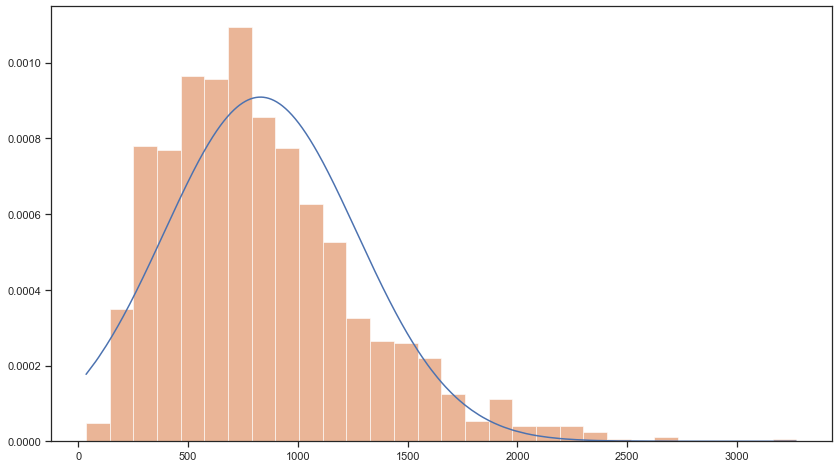

In [100]:
plt.figure(figsize=(14,8))
pl.plot(l, fitl)#, '-o')
#plt.hist(length, bins=30, density=True)
plt.hist(length, bins=30, alpha=.6, histtype='bar', density=True)#, linewidth=10)
plt.show()